In [218]:
import pandas as pd 
import numpy as np
from scipy.stats import pearsonr

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from wordcloud import WordCloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [219]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [220]:
cd '/content/drive/My Drive/MKTG6010'

/content/drive/.shortcut-targets-by-id/13mLItc9bNU04nIVBJS8dqkytNZTOUSRc/MKTG6010


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [221]:
#import the dataset
df = pd.read_csv('/content/drive/My Drive/MKTG6010/Project 2/tweets_sport.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [222]:
df = df.replace(' ',np.nan)
df.dropna(subset=['likes'], inplace=True) ###
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13522 entries, 0 to 13522
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13522 non-null  float64
 1   text              13522 non-null  object 
 2   event_number      13522 non-null  int64  
 3   player_dummy      13522 non-null  int64  
 4   team_dummy        13522 non-null  int64  
 5   weekday           13522 non-null  int64  
 6   month             13522 non-null  int64  
 7   day               13522 non-null  int64  
 8   time              13522 non-null  object 
 9   user_screen_name  13522 non-null  object 
 10  retweets          13522 non-null  float64
 11  likes             13522 non-null  float64
 12  comments          13522 non-null  float64
 13  Unnamed: 13       1 non-null      object 
dtypes: float64(4), int64(6), object(4)
memory usage: 1.5+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [223]:
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



id                      0
text                    0
event_number            0
player_dummy            0
team_dummy              0
weekday                 0
month                   0
day                     0
time                    0
user_screen_name        0
retweets                0
likes                   0
comments                0
Unnamed: 13         13521
dtype: int64

In [224]:
df.dropna(subset=['likes'], inplace=True)
df.drop(['Unnamed: 13'], axis=1, inplace=True)
df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



<class 'pandas.core.frame.DataFrame'>
Int64Index: 13522 entries, 0 to 13522
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13522 non-null  float64
 1   text              13522 non-null  object 
 2   event_number      13522 non-null  int64  
 3   player_dummy      13522 non-null  int64  
 4   team_dummy        13522 non-null  int64  
 5   weekday           13522 non-null  int64  
 6   month             13522 non-null  int64  
 7   day               13522 non-null  int64  
 8   time              13522 non-null  object 
 9   user_screen_name  13522 non-null  object 
 10  retweets          13522 non-null  float64
 11  likes             13522 non-null  float64
 12  comments          13522 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.4+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



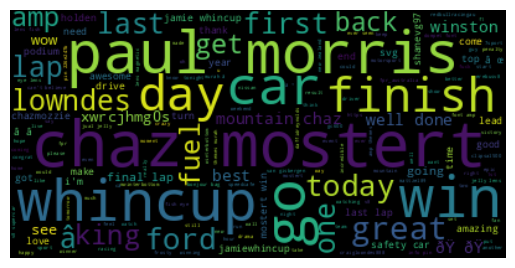

In [225]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# Create stopword list:
stop_words = set(stopwords.words('english'))
stop_words.update(["race","co","v8supercars","v8supercar","v8sc","rt", "bathurst","bathurst1000", "adelaide","http","tas","tcm","darwin","coateshire","sandown","clipsal","sydney", "townsville"])
textt = " ".join(review for review in df.text)


# Create word cloud
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [226]:
event_11 = df[df['event_number'] == 11]
event_11.dropna(inplace=True) # drop rows containing NaN values
len(event_11)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-226-94f0b8a6bc65>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



9619

In [227]:
pip install vaderSentiment

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [228]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [229]:
import nltk

nltk.download('vader_lexicon')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [230]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()


event_11[['neg', 'neu', 'pos', 'compound']] = event_11['text'].apply(lambda x: pd.Series(sentiment.polarity_scores(x)))
event_11.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-230-7c30ca8f9dc0>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-230-7c30ca8f9dc0>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-230-7

,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments,neg,neu,pos,compound
0,5.210000e+17,"""rt @dariofranchitti: this bathurst race has b...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0,0.0,0.644,0.356,0.8881
1,5.210000e+17,"""rt @wtf1couk: gp3 fans while you're waiting f...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0,0.0,0.862,0.138,0.4939
2,5.210000e+17,"""rt @sally_fitz: incredible final laps of #bat...",11,1,0,7,10,12,7:31,007cnt,0.0,0.0,0.0,0.0,0.833,0.167,0.5574
3,5.210000e+17,"""rt @v8supercars: top 10 - mostert, moffat, pe...",11,0,0,7,10,12,9:04,007pixxx,0.0,0.0,0.0,0.0,0.893,0.107,0.2023
4,5.210000e+17,"""#bathurst1000 i present to you, the fully st...",11,0,0,7,10,12,10:20,007pixxx,0.0,0.0,0.0,0.0,0.871,0.129,0.1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,5.210000e+17,"""to put what happened to svg into perspective,...",11,0,0,7,10,12,7:09,4theloveofindy,0.0,0.0,0.0,0.0,1.000,0.000,0.0000
123,5.210000e+17,"""big day: charlotte, bathurst, fuji, motegi an...",11,0,0,7,10,12,18:09,4theloveofindy,0.0,1.0,0.0,0.0,1.000,0.000,0.0000
124,5.210000e+17,"""blanchard in the wall. safety car throws a mo...",11,0,0,7,10,12,7:03,4theloveofindy,0.0,0.0,0.0,0.0,0.865,0.135,0.4215
128,5.210000e+17,"""more real than most reality tv #bathurst1000""",11,0,0,7,10,12,7:09,50shadesofteal,0.0,0.0,0.0,0.0,1.000,0.000,0.0000


In [231]:
event_11 = event_11[event_11['compound'] != 0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [232]:
event_11['sentiment'] = event_11['compound'].apply(lambda rating : +1 if rating > 0 else -1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-232-5952de7f9352>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [233]:
print("negative samples:",len(event_11[event_11["sentiment"]==-1]))
print("postitive samples:",len(event_11[event_11["sentiment"]==1]))

negative samples: 1592
postitive samples: 4275


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [234]:
positive_11 = event_11[event_11['sentiment'] == 1]
negative_11 = event_11[event_11['sentiment'] == -1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



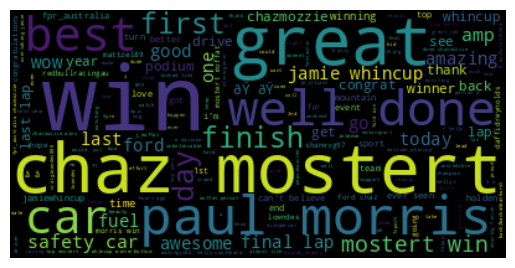

In [235]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# Create stopword list:
stop_words = set(stopwords.words('english'))
stop_words.update(["race","co","v8sc","v8supercar","v8supercars","rt", "bathurst","bathurst1000", "adelaide","http","tas","tcm","darwin","coateshire","sandown","clipsal","sydney", "townsville"])
textt = " ".join(review for review in positive_11.text)


# Create word cloud
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11_positive.png')
plt.show()

In [236]:
# df['event_number'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [237]:
text=positive_11['text']

#Change the text to lower case
text = text.map(lambda text: text.lower())
#Convert data from pandas format to list values  
text=text.values.tolist()

#print the first 3 tweets
print(text[:3])

['"rt @dariofranchitti: this bathurst race has been an absolute belter!! love the aussie commentary. was hoping for better for my mate @jcourtâ€¦"', '"rt @wtf1couk: gp3 fans while you\'re waiting for the race to resume, flick over to the #bathurst1000. exciting final few laps."', '"rt @sally_fitz: incredible final laps of #bathurst1000 remarkable comeback from @jamiewhincup coming from the back of the grid @redbullraciâ€¦"']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [238]:
import nltk
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [239]:
import nltk
nltk.download('vader_lexicon')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [240]:
# Conduct lemmatization for the words in the text
from nltk.stem import WordNetLemmatizer

tokens=[]
for sent in text:
    temp=[WordNetLemmatizer().lemmatize(word) for word in sent.split(" ")]
    tokens.append(temp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [241]:
# Customized the stopwords
from sklearn.feature_extraction import text 
# my_additional_stop_words = ["bathurst","adelaide","http","tas","tcm","darwin","coateshire","sandown","clipsal","sydney", "townsville"]
# stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

# my_additional_stop_words = ["bathurst","adelaide","http","tas","tcm","darwin","coateshire","sandown","clipsal","sydney", "townsville"]
#stop_words = text.ENGLISH_STOP_WORDS  #.union(my_additional_stop_words)
stop_words = list(stop_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Topic modelling for whole event 11

In [242]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

positive_11.dropna(inplace=True)  # drop rows containing NaN values
positive_11[['neg', 'neu', 'pos', 'compound']] = positive_11['text'].apply(lambda x: pd.Series(sentiment.polarity_scores(x)))
positive_11.head(100)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-242-7e4c11a17e07>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-242-7e4c11a17e07>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,text,event_number,player_dummy,team_dummy,weekday,month,day,time,user_screen_name,retweets,likes,comments,neg,neu,pos,compound,sentiment
0,5.210000e+17,"""rt @dariofranchitti: this bathurst race has b...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0,0.000,0.644,0.356,0.8881,1
1,5.210000e+17,"""rt @wtf1couk: gp3 fans while you're waiting f...",11,0,0,7,10,12,7:28,007_dot,0.0,0.0,0.0,0.000,0.862,0.138,0.4939,1
2,5.210000e+17,"""rt @sally_fitz: incredible final laps of #bat...",11,1,0,7,10,12,7:31,007cnt,0.0,0.0,0.0,0.000,0.833,0.167,0.5574,1
3,5.210000e+17,"""rt @v8supercars: top 10 - mostert, moffat, pe...",11,0,0,7,10,12,9:04,007pixxx,0.0,0.0,0.0,0.000,0.893,0.107,0.2023,1
4,5.210000e+17,"""#bathurst1000 i present to you, the fully st...",11,0,0,7,10,12,10:20,007pixxx,0.0,0.0,0.0,0.000,0.871,0.129,0.1970,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,5.210000e+17,"""rt @v8x_magazine: chaz mostert and paul morri...",11,0,0,7,10,12,12:41,_jabelicious_,0.0,0.0,0.0,0.119,0.693,0.188,0.3400,1
254,5.210000e+17,"""rt @v8chosenone: photo evidence, @chazmostert...",11,0,0,7,10,12,12:50,_jabelicious_,0.0,0.0,0.0,0.000,0.647,0.353,0.7964,1
258,5.210000e+17,"""rt @v8chosenone: anyone else having fun? ðŸ˜...",11,0,1,7,10,12,7:21,_jabelicious_,0.0,0.0,0.0,0.000,0.661,0.339,0.8268,1
259,5.210000e+17,"""rt @v8supercars: big moment for whincup, who ...",11,0,0,7,10,12,7:25,_jabelicious_,0.0,0.0,0.0,0.000,0.865,0.135,0.3612,1


In [243]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Set how many topics we need
NUM_TOPICS = 10
positive_11['tokens']=tokens
text_train = list(positive_11['tokens'].apply(lambda x: ' '.join(x)))

# Convert a collection of text documents to a matrix of token counts.
## min_df: ignore terms that have a document frequency strictly lower than the given threshold
## max_df: ignore terms that have a document frequency strictly higher than the given threshold
## stop_words: ‘english’, list
## lowercase: Convert all characters to lowercase before tokenizing.
## token_pattern: Regular expression denoting what constitutes a “token”
vectoriser = CountVectorizer(min_df=5, max_df=0.9,
                             stop_words=stop_words,lowercase=True,
                             token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}')

data_vectorized= vectoriser.fit_transform(text_train)

# Build a Latent Dirichlet Allocation Model
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS, max_iter=10, random_state=0, learning_method='online')
lda_Z = lda_model.fit_transform(data_vectorized)
 
#text = "mclaughlin: we can win front row qualifying only the start for volvo says young gun"
#x = lda_model.transform(vectorizer.transform([text]))[0]
#print(x, x.sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<unknown>:17: DeprecationWarning:

invalid escape sequence '\-'

<timed exec>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['supercar', 'supercars'] not in stop_words.



CPU times: user 7.99 s, sys: 31.9 ms, total: 8.03 s
Wall time: 13.8 s


In [244]:
print(lda_Z.shape)

(4275, 10)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Show the top 10 most frequent words in each topic


In [245]:
def print_topics(model, vectoriser, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx+1))
        feature_names = vectoriser.get_feature_names_out()
        print([(feature_names[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

print("LDA Model:")
print_topics(lda_model, vectoriser)
print("=" * 20)

LDA Model:
Topic 1:
[('best', 221.53525179681102), ('ever', 141.84010007862167), ('one', 133.38505967957096), ('sport', 103.15552747487035), ('time', 86.66865183967744), ('seen', 82.85169049323663), ('right', 64.65323608057021), ('say', 64.60999591461396), ('amp', 61.60736566065572), ('year', 50.07057649233031)]
Topic 2:
[('wow', 222.92781116192333), ('finish', 185.25309633680598), ('good', 144.6188511670898), ('supercars', 111.9243964996985), ('year', 109.36247651045463), ('great', 94.23179316070511), ('amazing', 94.03609091729375), ('brilliant', 77.18911187032286), ('winner', 76.54692239667436), ('unbelievable', 74.01004124843062)]
Topic 3:
[('nissan', 147.8462827837048), ('job', 99.92456046884088), ('msport', 84.71338130197417), ('better', 76.44059646912693), ('mate', 66.43782076472799), ('love', 63.79878243999527), ('hope', 58.737321973484384), ('wall', 53.3584429823389), ('supercars', 52.75542446996198), ('nismo', 48.286292426004465)]
Topic 4:
[('well', 286.2277942919187), ('done'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [246]:
x = lda_model.transform(data_vectorized)
print(x[3])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



[0.00769231 0.00769253 0.00769247 0.00769231 0.00769237 0.00769317
 0.00769243 0.9307676  0.00769231 0.0076925 ]


In [247]:
import pandas as pd
import numpy as np

topics=pd.DataFrame(x)
topics.columns=['topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9','topic10']

topics['tweet']=positive_11['text']
topics['month']=positive_11['month']
topics['day']=positive_11['day']
topics['event_number']=positive_11['event_number']
pd.DataFrame(topics).to_csv('tweets_by_topics_all_new.csv',index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [248]:
topics

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,tweet,month,day,event_number
0,0.009091,0.009091,0.918182,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,0.009091,"""rt @dariofranchitti: this bathurst race has b...",10.0,12.0,11.0
1,0.010000,0.010001,0.909991,0.010001,0.010000,0.010003,0.010002,0.010001,0.010000,0.010000,"""rt @wtf1couk: gp3 fans while you're waiting f...",10.0,12.0,11.0
2,0.007693,0.007692,0.007692,0.007693,0.007692,0.007694,0.930763,0.007692,0.007694,0.007695,"""rt @sally_fitz: incredible final laps of #bat...",10.0,12.0,11.0
3,0.007692,0.007693,0.007692,0.007692,0.007692,0.007693,0.007692,0.930768,0.007692,0.007692,"""rt @v8supercars: top 10 - mostert, moffat, pe...",10.0,12.0,11.0
4,0.033333,0.033334,0.033335,0.033335,0.033333,0.699996,0.033333,0.033333,0.033333,0.033333,"""#bathurst1000 i present to you, the fully st...",10.0,12.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,0.025004,0.774985,0.025000,0.025008,0.025000,0.025001,0.025000,0.025000,0.025000,0.025002,NaN,NaN,NaN,NaN
4271,0.025006,0.025000,0.025000,0.025002,0.025000,0.025000,0.274985,0.525000,0.025000,0.025007,"""""@heraldsunsport: mostert came from 25th on g...",10.0,12.0,11.0
4272,0.012500,0.276321,0.012501,0.373677,0.012500,0.012501,0.012500,0.012500,0.262499,0.012502,"""i'm sure she'd be proud. #adelaide http://t.c...",10.0,12.0,11.0
4273,0.282737,0.014286,0.014286,0.014286,0.157144,0.159199,0.014286,0.157143,0.172347,0.014287,NaN,NaN,NaN,NaN


In [249]:
!pip install PyLDAVis==3.4.0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [250]:
import pyLDAvis.lda_model
 
pyLDAvis.enable_notebook()

# The parameters wee need,
## LDA model: lda_model
## vectorized model: data_vectorized
## matrix of token counts: vectoriser

panel = pyLDAvis.lda_model.prepare(lda_model, data_vectorized, vectoriser, sort_topics = False)
panel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:244: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.237171 -0.138993       1        1   8.435007
1      0.209399 -0.089956       2        1  11.018132
2      0.082601  0.023324       3        1   8.667039
3      0.185266 -0.174758       4        1  10.640769
4     -0.137007  0.172616       5        1   6.488083
5      0.121068  0.156462       6        1  16.327094
6     -0.108892  0.035046       7        1   8.622241
7      0.005477  0.281670       8        1   8.310843
8     -0.236357 -0.153387       9        1   7.535529
9      0.115616 -0.112024      10        1  13.955263, topic_info=            Term        Freq       Total Category  logprob  loglift
128          car  401.000000  401.000000  Default  30.0000  30.0000
1053         win  695.000000  695.000000  Default  29.0000  29.0000
1046        well  275.000000  275.000000  Default  28.0000  28.0000
607      mostert  574.000000  574.000000  Default  27.0000  27.0000
154         chaz  428.000000  428.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
644   nickpercat   45.776732   72.052461  Topic10  -4.5063   1.5157
395        great   78.280525  373.125302  Topic10  -3.9697   0.4077
128          car   58.966612  401.879426  Topic10  -4.2531   0.0501
250        drive   37.519913  105.050647  Topic10  -4.7052   0.9397
542         love   36.832560  108.847921  Topic10  -4.7236   0.8857

[480 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         6  0.758689  abcgrandstand
0         8  0.235455  abcgrandstand
1         3  0.856975       absolute
1        10  0.131842       absolute
2         4  0.978228     absolutely
...     ...       ...            ...
1091      9  0.979467            yet
1093      9  0.975420        yolotus
1094      4  0.932349          young
1096      9  0.967851          ztpjs
1097      8  0.896827           zuqj

[539 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

Combining Topic Modeling and Sentiment Analysis together

In [251]:
import nltk
nltk.download('vader_lexicon')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [252]:
%%time
# import `SentimentIntensityAnalyzer` and load a model
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

CPU times: user 10.1 ms, sys: 0 ns, total: 10.1 ms
Wall time: 13.7 ms


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [253]:
# Using the model to process each tweet and call `compound` as polarity score

scores=[]
for tex in topics['tweet']:
    sentimentResults = sentiment.polarity_scores(tex)
    score = sentimentResults["compound"]
    scores.append(score)

# Show the score of index 1 
scores[1]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



AttributeError: ignored

In [ ]:
# Get the sentiment scores weighted by the topic relevance probability
### Create a new variable named 'topic_senti', and the values are sentiment score * topic relevance probability

# Topic 1
topics['topic1_senti'] = topics['topic1'] * scores

In [ ]:
# Topic 2
topics['topic2_senti'] = topics['topic2'] * scores